##Linear and Decision Tree Regression Modeling

###Author: Frederico Tremonti


In [1]:
# Mathematics and Statistics Packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
from scipy.stats import f_oneway
from sklearn.feature_selection import f_regression

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colab Packages
from google.colab import drive, data_table

# Data Preparation Packages
from sklearn.model_selection import train_test_split

# Linear Regression Packages
from sklearn.linear_model import LinearRegression

# Decision Tree Packages
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree

# Model Evaluation Packages
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#Random State
random_state = 0

#Function to display values on top of graphs
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading csv file
df = pd.read_csv("/content/drive/MyDrive/IS4482_DataSets/NA_sales_filtered.csv", encoding="ISO-8859-1")

#### High-Level Analysis of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          6345 non-null   object 
 1   Platform      6345 non-null   object 
 2   Genre         6345 non-null   object 
 3   Rating        6345 non-null   object 
 4   Critic_Score  6345 non-null   int64  
 5   Critic_Count  6345 non-null   int64  
 6   User_Score    6345 non-null   int64  
 7   User_Count    6345 non-null   int64  
 8   NA_Sales      6345 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 446.3+ KB


In [5]:
df.describe(include='all')

Name Platform   Genre Rating  Critic_Score  Critic_Count  \
count            6345     6345    6345   6345   6345.000000   6345.000000   
unique           4088       16      12      5           NaN           NaN   
top     Madden NFL 07      PS2  Action      T           NaN           NaN   
freq                8     1135    1549   2182           NaN           NaN   
mean              NaN      NaN     NaN    NaN     69.819385     28.966745   
std               NaN      NaN     NaN    NaN     13.945811     19.098594   
min               NaN      NaN     NaN    NaN     13.000000      3.000000   
25%               NaN      NaN     NaN    NaN     61.000000     14.000000   
50%               NaN      NaN     NaN    NaN     72.000000     25.000000   
75%               NaN      NaN     NaN    NaN     80.000000     40.000000   
max               NaN      NaN     NaN    NaN     98.000000    113.000000   

         User_Score    User_Count     NA_Sales  
count   6345.000000   6345.000000  6345.000000  
unique          NaN           NaN          NaN  
top             NaN           NaN          NaN  
freq            NaN           NaN          NaN  
mean      70.765485    152.730969     0.354230  
std       14.438432    545.962483     0.494404  
min        5.000000      4.000000     0.010000  
25%       64.000000     10.000000     0.080000  
50%       74.000000     24.000000     0.170000  
75%       81.000000     77.000000     0.410000  
max       95.000000  10665.000000     3.490000

In [6]:
df.head(12)

Name Platform         Genre Rating  \
0                Final Fantasy VII       PS  Role-Playing      T   
1                  Final Fantasy X      PS2  Role-Playing      T   
2                       The Sims 3       PC    Simulation      T   
3               Final Fantasy VIII       PS  Role-Playing      T   
4                         Tekken 3       PS      Fighting      T   
5        Medal of Honor: Frontline      PS2       Shooter      T   
6   Uncharted 3: Drake's Deception      PS3        Action      T   
7       Uncharted 2: Among Thieves      PS3        Action      T   
8                World of Warcraft       PC  Role-Playing      T   
9                           Driver       PS        Action      T   
10               Final Fantasy XII      PS2  Role-Playing      T   
11                        Tekken 2       PS      Fighting      T   

    Critic_Score  Critic_Count  User_Score  User_Count  NA_Sales  
0             92            20          91        1282      3.01  
1             92            53          86        1056      2.91  
2             86            75          75         886      0.99  
3             90            24          85         644      2.28  
4             96            15          90         367      3.27  
5             88            29          84         135      2.93  
6             92            97          82        3712      2.77  
7             96           105          87        5187      3.27  
8             93            57          72        2182      0.08  
9             87            22          80          78      3.11  
10            92            64          75         972      1.88  
11            89             8          88         102      2.26

In [7]:
counts = df['Name'].value_counts()
counts_df = counts.rename_axis('name').reset_index(name='count')

In [8]:
counts

Madden NFL 07                                  8
Spider-Man 3                                   7
Madden NFL 08                                  7
LEGO Star Wars II: The Original Trilogy        7
LEGO Indiana Jones: The Original Adventures    7
                                              ..
Etrian Odyssey Untold: The Millennium Girl     1
Microsoft Flight Simulator X                   1
Mega Man Battle Network                        1
Colony Wars                                    1
Final Fantasy VII                              1
Name: Name, Length: 4088, dtype: int64

In [9]:
counts_df.head(10)

name  count
0                                      Madden NFL 07      8
1                                       Spider-Man 3      7
2                                      Madden NFL 08      7
3            LEGO Star Wars II: The Original Trilogy      7
4        LEGO Indiana Jones: The Original Adventures      7
5                        Need for Speed: Most Wanted      7
6                         LEGO Batman: The Videogame      7
7                                         The Sims 2      7
8                              Need for Speed Carbon      6
9  Peter Jackson's King Kong: The Official Game o...      6

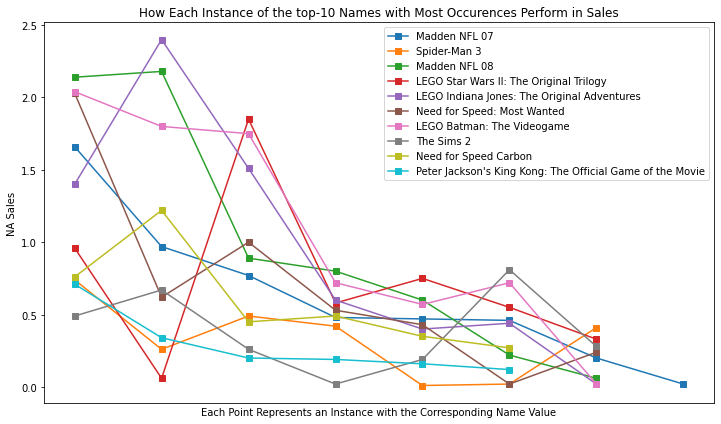

In [10]:
#Verifying if games with repeated rows display any evidence that name my impact NA_Sales
plt.figure(figsize=(12, 7))
madden07_rows = df[df['Name'] == 'Madden NFL 07']
spider_man_3_rows = df[df['Name'] == 'Spider-Man 3']
madden08_rows = df[df['Name'] == 'Madden NFL 08']
lego_star_wars_rows = df[df['Name'] == 'LEGO Star Wars II: The Original Trilogy']
lego_indiana_jones_rows = df[df['Name'] == 'LEGO Indiana Jones: The Original Adventures']
need_for_speed_rows = df[df['Name'] == 'Need for Speed: Most Wanted']
lego_batman_rows = df[df['Name'] == 'LEGO Batman: The Videogame']
the_sims_rows = df[df['Name'] == 'The Sims 2']
need_for_speed_carbon__rows = df[df['Name'] == 'Need for Speed Carbon']
king_kong_rows = df[df['Name'] == "Peter Jackson's King Kong: The Official Game of the Movie"]
plt.plot(range(len(madden07_rows)), madden07_rows['NA_Sales'], marker='s')
plt.plot(range(len(spider_man_3_rows)), spider_man_3_rows['NA_Sales'], marker='s')
plt.plot(range(len(madden08_rows)), madden08_rows['NA_Sales'], marker='s')
plt.plot(range(len(lego_star_wars_rows)), lego_star_wars_rows['NA_Sales'], marker='s')
plt.plot(range(len(lego_indiana_jones_rows)), lego_indiana_jones_rows['NA_Sales'], marker='s')
plt.plot(range(len(need_for_speed_rows)), need_for_speed_rows['NA_Sales'], marker='s')
plt.plot(range(len(lego_batman_rows)), lego_batman_rows['NA_Sales'], marker='s')
plt.plot(range(len(the_sims_rows)), the_sims_rows['NA_Sales'], marker='s')
plt.plot(range(len(need_for_speed_carbon__rows)), need_for_speed_carbon__rows['NA_Sales'], marker='s')
plt.plot(range(len(king_kong_rows)), king_kong_rows['NA_Sales'], marker='s')
plt.legend(['Madden NFL 07', 'Spider-Man 3', 'Madden NFL 08', 'LEGO Star Wars II: The Original Trilogy', 
            'LEGO Indiana Jones: The Original Adventures', 'Need for Speed: Most Wanted', 'LEGO Batman: The Videogame', 
            'The Sims 2', 'Need for Speed Carbon', "Peter Jackson's King Kong: The Official Game of the Movie"])
plt.title('How Each Instance of the top-10 Names with Most Occurences Perform in Sales')
plt.xlabel('Each Point Represents an Instance with the Corresponding Name Value')
plt.ylabel('NA Sales')
plt.xticks([])
plt.show()

In [11]:
#Dropping Name column after analyzing graph
df = df.drop(columns='Name')

The reason for dropping column "Name" is because it seems to be functioning as index instead of a predictor. First, as seen in the "value_counts" table, this columns seems to almost uniquely indentify each rows which suggests that is playing the role of an index. Second, when we analyze the graph above we see that, with the exception of light blue dots ("Peter Jackson's King Kong: The Official Game of the Movie"), the colors are essentially randomly positioned, which could mean that the name has no correlation with the sales. If there was actually a correlation between number of sales and the name, we should be seeing dots of the same color forming a horizontal line. Thus, because Name behaves as an index column to this dataframe, it must be dropped.

In [12]:
#Recalling categorical variables
categ_variables = []
for column in df.columns:
  if df[column].dtype == 'object':
    categ_variables.append(column)

In [13]:
categ_variables

['Platform', 'Genre', 'Rating']

#####Summary statitics: Platform

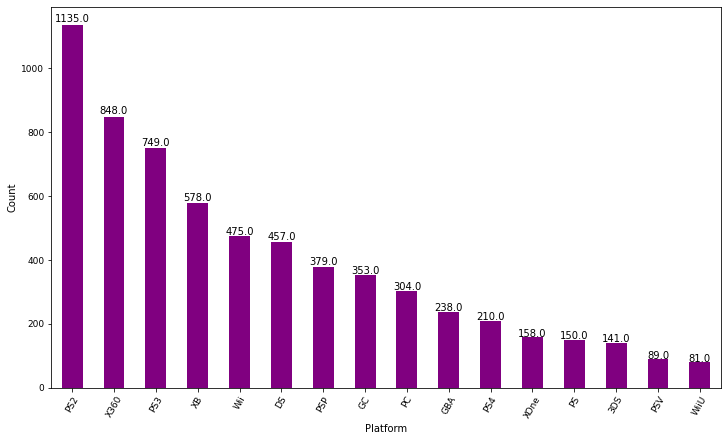

In [14]:
plt.figure(figsize=(12, 7))
platform_count = df['Platform'].value_counts().plot(kind='bar', rot=60, color='purple', ylabel='Count', xlabel='Platform', fontsize=9)
show_values(platform_count)
plt.show()

In [15]:
#include='float64' because the target variable is the only variable with this dtype.
df.groupby(['Platform']).describe(include='float64')

NA_Sales                                                       
            count      mean       std   min     25%    50%     75%   max
Platform                                                                
3DS         141.0  0.250426  0.305228  0.01  0.0800  0.150  0.3000  2.03
DS          457.0  0.315492  0.443909  0.01  0.0800  0.150  0.3300  3.43
GBA         238.0  0.336092  0.469236  0.01  0.0600  0.170  0.4175  3.14
GC          353.0  0.284873  0.353012  0.01  0.0700  0.150  0.3400  2.60
PC          304.0  0.200724  0.424849  0.01  0.0200  0.050  0.1425  2.57
PS          150.0  0.544200  0.776311  0.01  0.0825  0.230  0.5775  3.42
PS2        1135.0  0.375304  0.521411  0.01  0.0700  0.160  0.4500  3.49
PS3         749.0  0.410881  0.523826  0.01  0.1200  0.230  0.4700  3.27
PS4         210.0  0.383333  0.543604  0.01  0.0400  0.140  0.4675  2.81
PSP         379.0  0.219393  0.304959  0.01  0.0700  0.120  0.2400  2.90
PSV          89.0  0.112809  0.124563  0.01  0.0300  0.080  0.1500  0.71
Wii         475.0  0.398947  0.481355  0.01  0.1100  0.230  0.4650  3.48
WiiU         81.0  0.378889  0.565117  0.01  0.0900  0.200  0.3600  3.15
X360        848.0  0.468432  0.585431  0.01  0.1100  0.240  0.5500  3.40
XB          578.0  0.249204  0.301924  0.01  0.0625  0.140  0.3200  2.09
XOne        158.0  0.481203  0.640789  0.01  0.0800  0.235  0.6300  3.22

#####Summary statitics: Genre

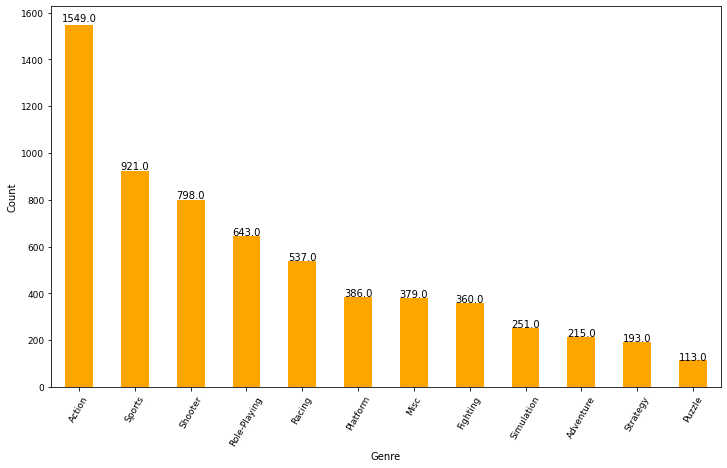

In [16]:
plt.figure(figsize=(12, 7))
genre_count = df['Genre'].value_counts().plot(kind='bar', rot=60, color='orange', ylabel='Count', xlabel='Genre', fontsize=9)
show_values(genre_count)
plt.show()

In [17]:
#include='float64' because the target variable is the only variable with this dtype.
df.groupby(['Genre']).describe(include='float64')

NA_Sales                                                     
                count      mean       std   min   25%    50%     75%   max
Genre                                                                     
Action         1549.0  0.344519  0.494515  0.01  0.08  0.160  0.3900  3.27
Adventure       215.0  0.178930  0.319406  0.01  0.05  0.090  0.1800  3.28
Fighting        360.0  0.350139  0.426072  0.01  0.09  0.205  0.4200  3.27
Misc            379.0  0.438338  0.575711  0.01  0.10  0.210  0.5050  3.49
Platform        386.0  0.368446  0.478433  0.01  0.09  0.195  0.4500  3.17
Puzzle          113.0  0.299292  0.480349  0.01  0.07  0.110  0.2800  3.43
Racing          537.0  0.340298  0.493117  0.01  0.07  0.150  0.3900  3.27
Role-Playing    643.0  0.323935  0.512838  0.01  0.07  0.140  0.3300  3.40
Shooter         798.0  0.396266  0.533859  0.01  0.07  0.190  0.4775  3.22
Simulation      251.0  0.369602  0.482114  0.01  0.06  0.190  0.4500  3.07
Sports          921.0  0.405136  0.494622  0.01  0.11  0.230  0.4800  3.42
Strategy        193.0  0.176632  0.287465  0.01  0.04  0.090  0.1900  2.57

#####Summary statitics: Rating

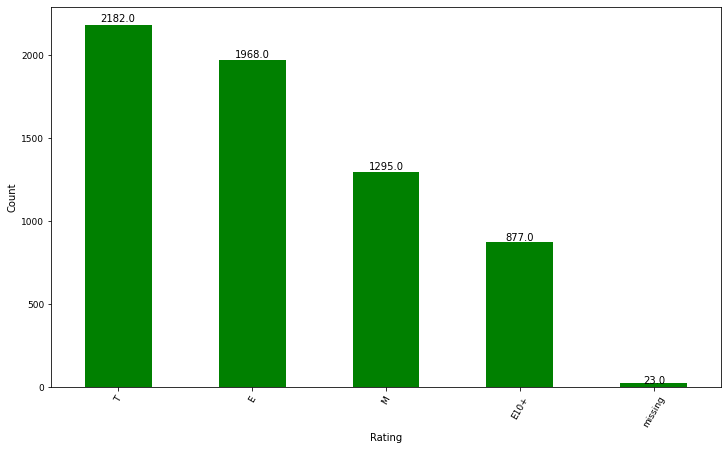

In [18]:
plt.figure(figsize=(12, 7))
rating_count = df['Rating'].value_counts().plot(kind='bar', rot=60, color='green', ylabel='Count', xlabel='Rating', fontsize=9)
show_values(rating_count)
plt.show()

In [19]:
#include='float64' because the target variable is the only variable with this dtype.
df.groupby(['Rating']).describe(include='float64')

NA_Sales                                                  
           count      mean       std   min   25%   50%   75%   max
Rating                                                            
E         1968.0  0.390661  0.510266  0.01  0.09  0.19  0.48  3.43
E10+       877.0  0.307366  0.396112  0.01  0.08  0.17  0.37  3.48
M         1295.0  0.404819  0.571776  0.01  0.07  0.17  0.47  3.40
T         2182.0  0.312731  0.461576  0.01  0.07  0.15  0.34  3.49
missing     23.0  0.112609  0.140461  0.01  0.05  0.07  0.13  0.68

In [20]:
#Converting integer variables to float variables
for column in df.columns:
  if df[column].dtype == 'int64':
    df[column] = df[column].astype('float64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6345 entries, 0 to 6344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      6345 non-null   object 
 1   Genre         6345 non-null   object 
 2   Rating        6345 non-null   object 
 3   Critic_Score  6345 non-null   float64
 4   Critic_Count  6345 non-null   float64
 5   User_Score    6345 non-null   float64
 6   User_Count    6345 non-null   float64
 7   NA_Sales      6345 non-null   float64
dtypes: float64(5), object(3)
memory usage: 396.7+ KB


#####Eliminating outliers from Critic_Score

In [22]:
critic_score_q1 = np.quantile(df['Critic_Score'], 0.25)
critic_score_q3 = np.quantile(df['Critic_Score'], 0.75)
iqr_critic_score = stats.iqr(df['Critic_Score'])
df = df[ (df['Critic_Score'] > critic_score_q1 - 1.5 * iqr_critic_score) & (df['Critic_Score'] < critic_score_q3 + 1.5 * iqr_critic_score) ]

#####Eliminating outliers from Critic_Count

In [23]:
critic_count_q1 = np.quantile(df['Critic_Count'], 0.25)
critic_count_q3 = np.quantile(df['Critic_Count'], 0.75)
iqr_critic_count = stats.iqr(df['Critic_Count'])
df = df[ (df['Critic_Count'] > critic_count_q1 - 1.5 * iqr_critic_count) & (df['Critic_Count'] < critic_count_q3 + 1.5 * iqr_critic_count) ]

#####Eliminating outliers from User_Score

In [24]:
user_score_q1 = df['User_Score'].quantile(0.25)
user_score_q3 = df['User_Score'].quantile(0.75)
iqr_user_score = stats.iqr(df['User_Score'])
df = df[ (df['User_Score'] > user_score_q1 - 1.5 * iqr_user_score) & (df['User_Score'] < user_score_q3 + 1.5 * iqr_user_score) ]

#####Eliminating outliers from User_Count

In [25]:
user_count_q1 = np.quantile(df['User_Count'], 0.25)
user_count_q3 = np.quantile(df['User_Count'], 0.75)
iqr_user_count = stats.iqr(df['User_Count'])
df = df[ (df['User_Count'] > user_count_q1 - 1.5 * iqr_user_count) & (df['User_Count'] < user_count_q3 + 1.5 * iqr_user_count) ]

####Plotting Distribution of the Traget Variable

In [26]:
na_sales_q1 = df['NA_Sales'].quantile(0.25)
na_sales_q3 = df['NA_Sales'].quantile(0.75)
iqr_na_sales = stats.iqr(df['NA_Sales'])
df = df[ (df['NA_Sales'] > na_sales_q1 - 1.5 * iqr_na_sales) & (df['NA_Sales'] < na_sales_q3 + 1.5 * iqr_na_sales) ]

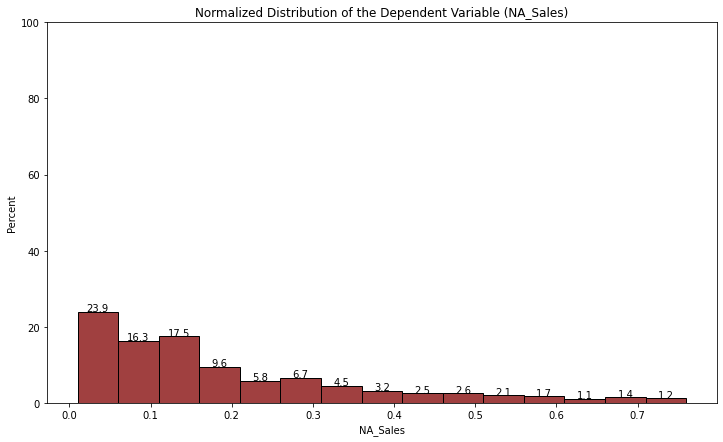

In [27]:
plt.figure(figsize=(12, 7))
plt.ylim(0, 100)
plt.title('Normalized Distribution of the Dependent Variable (NA_Sales)')
show_values(sns.histplot(df['NA_Sales'], bins=15, color='maroon', stat='percent'))
plt.show()

###Pairplotting Float Variables

#####Hue="Platform"

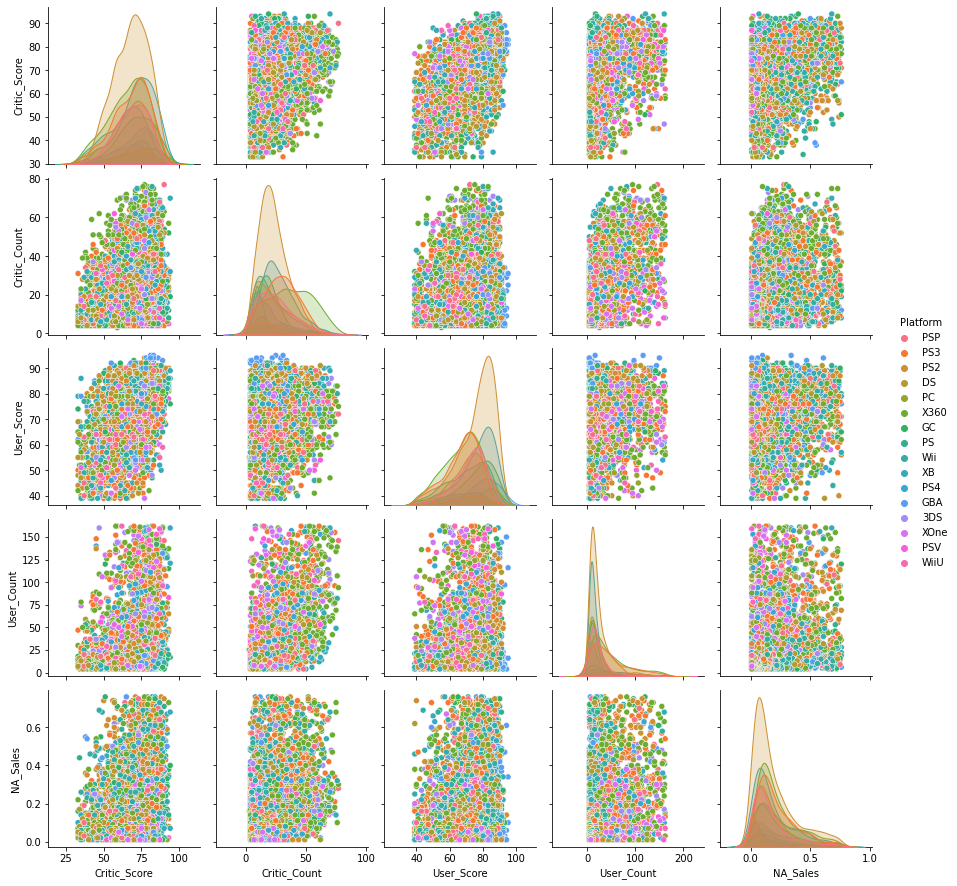

In [28]:
sns.pairplot(data=df, hue="Platform")

#####Hue="Genre"

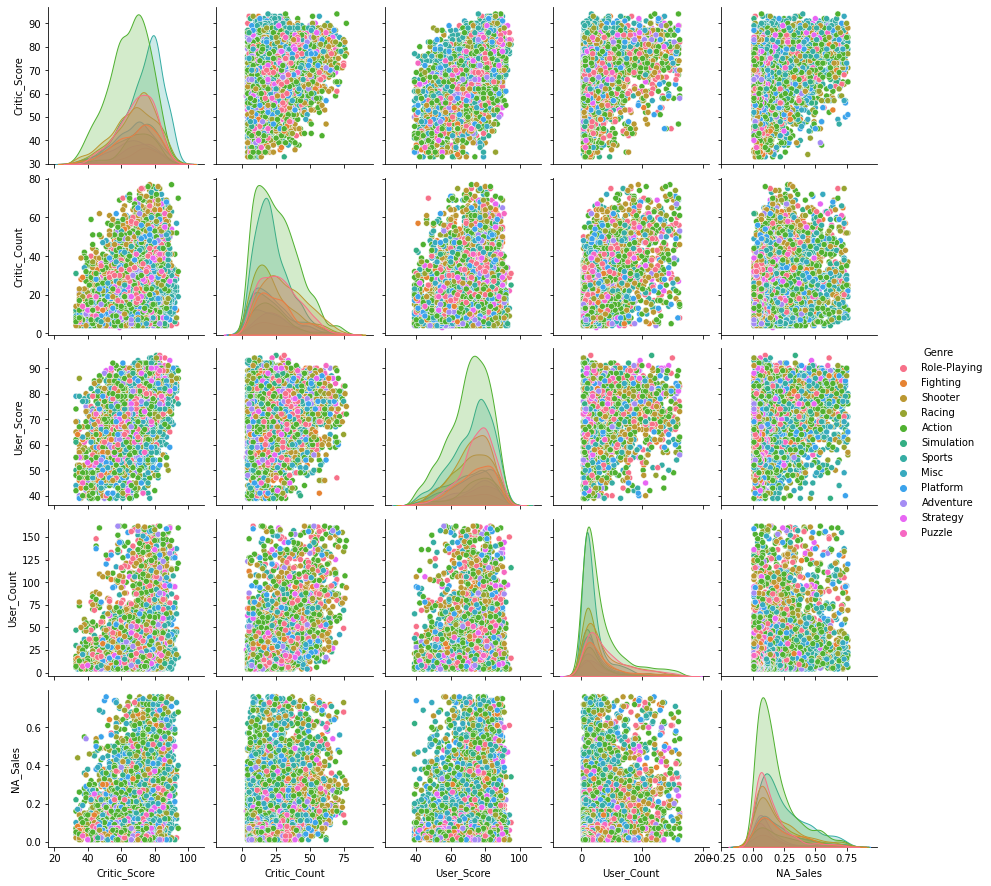

In [29]:
sns.pairplot(data=df, hue="Genre")

#####Hue="Rating"

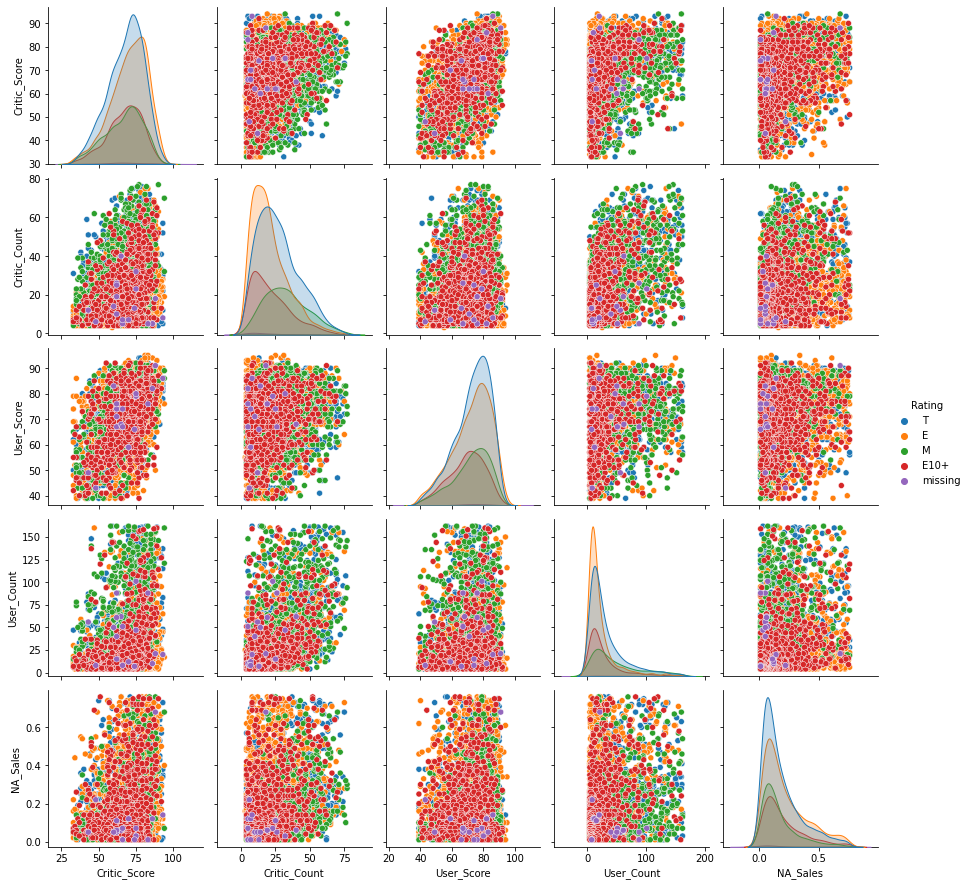

In [30]:
sns.pairplot(data=df, hue="Rating")

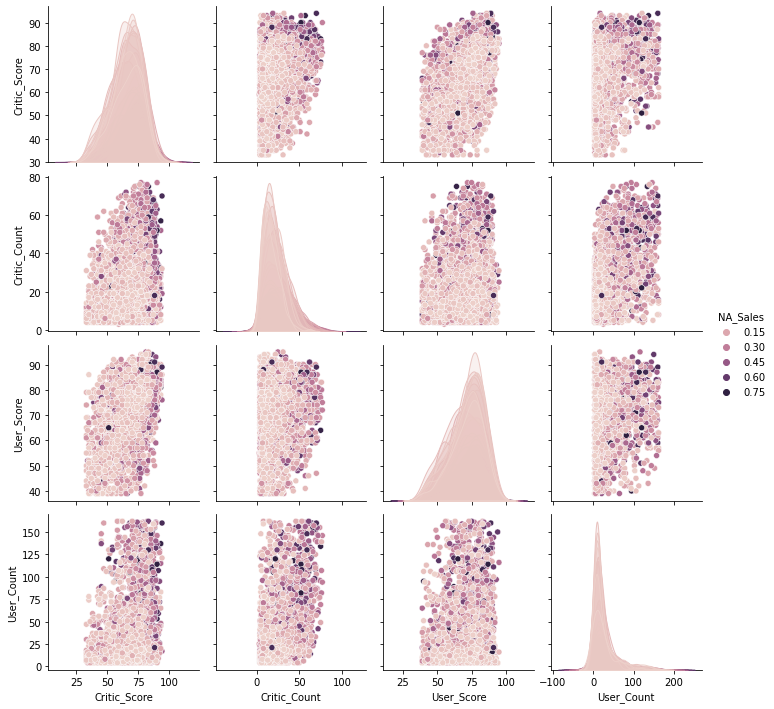

In [31]:
sns.pairplot(data=df, hue="NA_Sales")

####Preparing Data for Correlation and Train-Test Split

In [32]:
#converting object variables to categorical
df[categ_variables] = df[categ_variables].astype('category')
df_onehot = pd.get_dummies(df, columns=categ_variables)

In [33]:
#Verifying one hot encoded datframe
df_onehot

Critic_Score  Critic_Count  User_Score  User_Count  NA_Sales  \
13            81.0          48.0        86.0       124.0      0.47   
92            72.0          38.0        86.0        83.0      0.37   
111           79.0          61.0        79.0       139.0      0.51   
121           64.0          45.0        74.0        30.0      0.52   
128           59.0          40.0        58.0        71.0      0.63   
...            ...           ...         ...         ...       ...   
6340          62.0          19.0        76.0        61.0      0.06   
6341          60.0          14.0        83.0        50.0      0.05   
6342          83.0           5.0        76.0        88.0      0.01   
6343          66.0           7.0        74.0         8.0      0.01   
6344          74.0          13.0        66.0         7.0      0.01   

      Platform_3DS  Platform_DS  Platform_GBA  Platform_GC  Platform_PC  ...  \
13               0            0             0            0            0  ...   
92               0            0             0            0            0  ...   
111              0            0             0            0            0  ...   
121              0            0             0            0            0  ...   
128              0            0             0            0            0  ...   
...            ...          ...           ...          ...          ...  ...   
6340             0            0             0            0            0  ...   
6341             0            0             0            0            0  ...   
6342             0            0             0            0            0  ...   
6343             0            0             0            0            0  ...   
6344             0            0             0            0            0  ...   

      Genre_Role-Playing  Genre_Shooter  Genre_Simulation  Genre_Sports  \
13                     1              0                 0             0   
92                     1              0                 0             0   
111                    0              0                 0             0   
121                    0              1                 0             0   
128                    0              0                 0             0   
...                  ...            ...               ...           ...   
6340                   0              0                 0             0   
6341                   0              0                 0             0   
6342                   0              0                 0             0   
6343                   0              0                 0             0   
6344                   0              0                 0             0   

      Genre_Strategy  Rating_E  Rating_E10+  Rating_M  Rating_T  \
13                 0         0            0         0         1   
92                 0         0            0         0         1   
111                0         0            0         0         1   
121                0         0            0         0         1   
128                0         0            0         0         1   
...              ...       ...          ...       ...       ...   
6340               0         0            0         0         0   
6341               0         0            0         0         0   
6342               0         0            0         0         0   
6343               0         0            0         0         0   
6344               0         0            0         0         0   

      Rating_missing  
13                 0  
92                 0  
111                0  
121                0  
128                0  
...              ...  
6340               1  
6341               1  
6342               1  
6343               1  
6344               1  

[4698 rows x 38 columns]

In [34]:
correlation_onehot = df_onehot.corr()

In [35]:
correlation_onehot

Critic_Score  Critic_Count  User_Score  User_Count  \
Critic_Score            1.000000      0.276208    0.524665    0.262897   
Critic_Count            0.276208      1.000000    0.123693    0.495794   
User_Score              0.524665      0.123693    1.000000    0.092924   
User_Count              0.262897      0.495794    0.092924    1.000000   
NA_Sales                0.266511      0.226521    0.093179    0.247162   
Platform_3DS           -0.032295      0.024718   -0.069690    0.069542   
Platform_DS            -0.032609     -0.053668   -0.019950   -0.088565   
Platform_GBA            0.039527     -0.133576    0.094618   -0.090742   
Platform_GC             0.059560     -0.091020    0.085028   -0.098703   
Platform_PC             0.020287     -0.063209   -0.034281    0.127182   
Platform_PS             0.048788     -0.152743    0.073111   -0.021208   
Platform_PS2           -0.019332     -0.064517    0.156893   -0.104053   
Platform_PS3           -0.001283      0.113943   -0.147238    0.174300   
Platform_PS4            0.029778      0.048416   -0.034573    0.138748   
Platform_PSP            0.001405     -0.001584    0.001507   -0.055217   
Platform_PSV            0.010915     -0.010942    0.012309    0.115198   
Platform_Wii           -0.102780     -0.073539   -0.052479   -0.083212   
Platform_WiiU           0.004960     -0.068932   -0.048591    0.091337   
Platform_X360          -0.075552      0.287599   -0.156748    0.178289   
Platform_XB             0.103196      0.061297    0.108784   -0.154405   
Platform_XOne           0.021865     -0.076541   -0.064568    0.114804   
Genre_Action           -0.155413      0.026507   -0.068306    0.047797   
Genre_Adventure        -0.054604     -0.026655    0.007481   -0.018806   
Genre_Fighting          0.005546      0.014652    0.022028    0.010634   
Genre_Misc             -0.003459     -0.033052   -0.053314   -0.057477   
Genre_Platform         -0.013368     -0.055755    0.007137   -0.022649   
Genre_Puzzle            0.031183      0.012347    0.001397   -0.050101   
Genre_Racing            0.001732     -0.033314   -0.020701   -0.049106   
Genre_Role-Playing      0.020385      0.057967    0.075461    0.132101   
Genre_Shooter          -0.032457      0.133230   -0.004406    0.084347   
Genre_Simulation        0.023537     -0.041493    0.037588   -0.032894   
Genre_Sports            0.190470     -0.080660    0.007917   -0.105360   
Genre_Strategy          0.027185     -0.006590    0.046132    0.003422   
Rating_E                0.107299     -0.194623    0.026943   -0.189137   
Rating_E10+            -0.040859     -0.091218   -0.106307   -0.037175   
Rating_M               -0.065857      0.215044   -0.006374    0.227772   
Rating_T               -0.025706      0.101956    0.057080    0.039551   
Rating_missing          0.002859     -0.039973   -0.001433    0.020714   

                    NA_Sales  Platform_3DS  Platform_DS  Platform_GBA  \
Critic_Score        0.266511     -0.032295    -0.032609      0.039527   
Critic_Count        0.226521      0.024718    -0.053668     -0.133576   
User_Score          0.093179     -0.069690    -0.019950      0.094618   
User_Count          0.247162      0.069542    -0.088565     -0.090742   
NA_Sales            1.000000     -0.018557    -0.020251      0.008567   
Platform_3DS       -0.018557      1.000000    -0.046103     -0.033104   
Platform_DS        -0.020251     -0.046103     1.000000     -0.061925   
Platform_GBA        0.008567     -0.033104    -0.061925      1.000000   
Platform_GC         0.017620     -0.041799    -0.078191     -0.056144   
Platform_PC        -0.114321     -0.020131    -0.037658     -0.027039   
Platform_PS         0.011629     -0.024308    -0.045472     -0.032651   
Platform_PS2       -0.007503     -0.077679    -0.145310     -0.104337   
Platform_PS3        0.054759     -0.054361    -0.101690     -0.073017   
Platform_PS4       -0.086470     -0.022914    -0.042864     -0.030778   
Platform_PSP       -0.036278     -0.04

####Plotting Correlation Chart

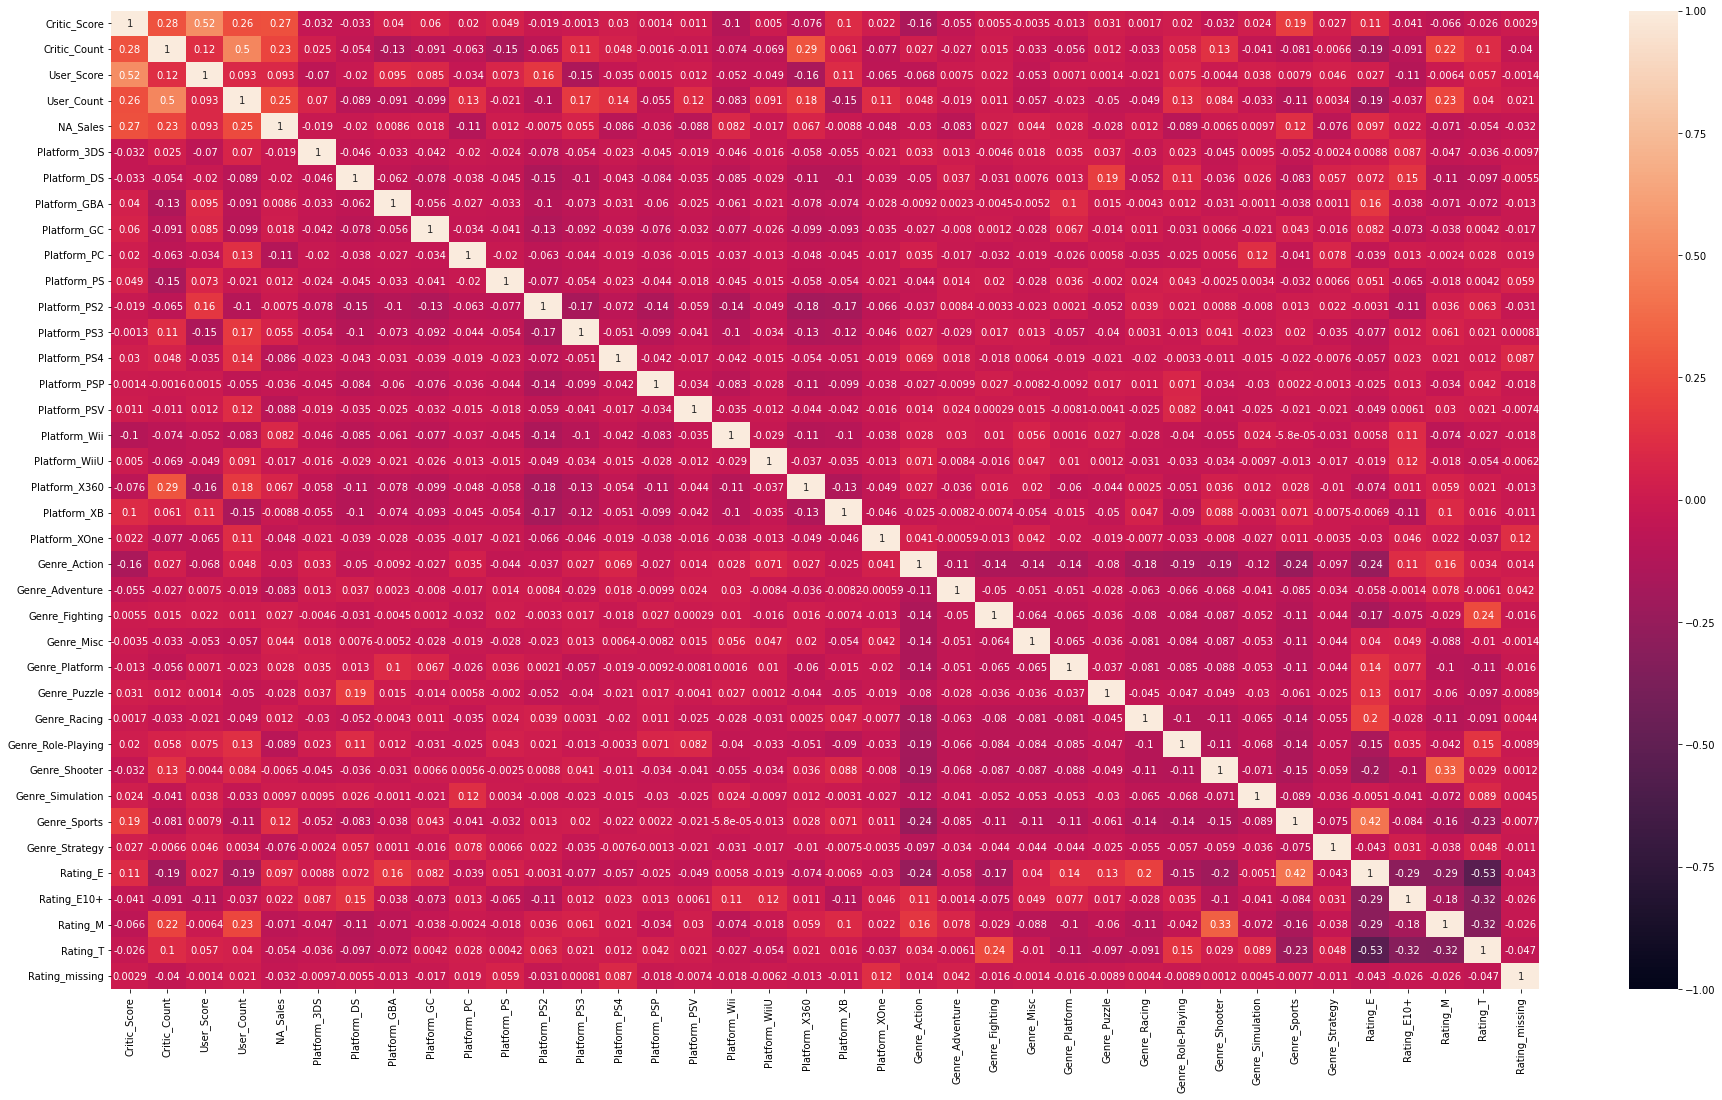

In [36]:
plt.figure(figsize=(32, 18))
heat_map = sns.heatmap(correlation_onehot, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [37]:
print(correlation_onehot.abs().min().sort_values())

Genre_Sports          0.000058
Platform_Wii          0.000058
Genre_Fighting        0.000292
Platform_PSV          0.000292
Genre_Adventure       0.000591
Platform_XOne         0.000591
Rating_missing        0.000811
Platform_PS3          0.000811
Genre_Strategy        0.001051
Platform_GBA          0.001051
Genre_Simulation      0.001149
Platform_GC           0.001197
Genre_Puzzle          0.001229
Platform_WiiU         0.001229
Genre_Shooter         0.001249
Platform_PSP          0.001272
Critic_Score          0.001283
Genre_Misc            0.001380
User_Score            0.001397
Rating_E10+           0.001398
Genre_Platform        0.001550
Critic_Count          0.001584
Genre_Racing          0.001732
Platform_PS           0.002020
Platform_PS2          0.002143
Platform_PC           0.002363
Rating_M              0.002363
Platform_3DS          0.002438
Platform_X360         0.002497
Rating_E              0.003069
Platform_XB           0.003141
Platform_PS4          0.003289
Genre_Ro

####Conclusions

User_Score and Critic_Score had the strongest positive correlation, Rating_T and Rating_E presented the strongest negative correlation, and Genre_Sport and Platform_Wii had the least correlation.

(1) Independent Variable Most Likely to Affect NA_Sales: Critic Score - coefficient of correlation = 0.27

(2) Two pairs of variables that are colliner: User Count and Critic Count / Rating_T and Rating_M

###Train-Test Split

In [38]:
train_df, test_df = train_test_split(df_onehot, train_size=0.7, random_state=random_state)

#####Training Set

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 3485 to 3558
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        3288 non-null   float64
 1   Critic_Count        3288 non-null   float64
 2   User_Score          3288 non-null   float64
 3   User_Count          3288 non-null   float64
 4   NA_Sales            3288 non-null   float64
 5   Platform_3DS        3288 non-null   uint8  
 6   Platform_DS         3288 non-null   uint8  
 7   Platform_GBA        3288 non-null   uint8  
 8   Platform_GC         3288 non-null   uint8  
 9   Platform_PC         3288 non-null   uint8  
 10  Platform_PS         3288 non-null   uint8  
 11  Platform_PS2        3288 non-null   uint8  
 12  Platform_PS3        3288 non-null   uint8  
 13  Platform_PS4        3288 non-null   uint8  
 14  Platform_PSP        3288 non-null   uint8  
 15  Platform_PSV        3288 non-null   uint8  
 16  Pla

In [40]:
train_df.describe(include='all')

Critic_Score  Critic_Count   User_Score   User_Count     NA_Sales  \
count   3288.000000   3288.000000  3288.000000  3288.000000  3288.000000   
mean      68.346107     24.911192    71.907847    29.858273     0.195271   
std       12.181421     15.045798    11.767511    32.011340     0.172210   
min       33.000000      3.000000    39.000000     4.000000     0.010000   
25%       60.000000     13.000000    64.000000     8.000000     0.070000   
50%       70.000000     22.000000    74.000000    17.000000     0.140000   
75%       78.000000     34.000000    81.000000    37.000000     0.270000   
max       94.000000     77.000000    95.000000   162.000000     0.760000   

       Platform_3DS  Platform_DS  Platform_GBA  Platform_GC  Platform_PC  ...  \
count   3288.000000  3288.000000   3288.000000  3288.000000  3288.000000  ...   
mean       0.024939     0.077859      0.042883     0.066910     0.014599  ...   
std        0.155963     0.267990      0.202625     0.249904     0.119957  ...   
min        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
50%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
75%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
max        1.000000     1.000000      1.000000     1.000000     1.000000  ...   

       Genre_Role-Playing  Genre_Shooter  Genre_Simulation  Genre_Sports  \
count         3288.000000    3288.000000       3288.000000   3288.000000   
mean             0.095803       0.106144          0.039538      0.161496   
std              0.294366       0.308068          0.194900      0.368044   
min              0.000000       0.000000          0.000000      0.000000   
25%              0.000000       0.000000          0.000000      0.000000   
50%              0.000000       0.000000          0.000000      0.000000   
75%              0.000000       0.000000          0.000000      0.000000   
max              1.000000       1.000000          1.000000      1.000000   

       Genre_Strategy     Rating_E  Rating_E10+     Rating_M     Rating_T  \
count     3288.000000  3288.000000  3288.000000  3288.000000  3288.000000   
mean         0.028285     0.322080     0.156934     0.149027     0.368309   
std          0.165810     0.467345     0.363794     0.356169     0.482419   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          0.000000     0.000000     0.000000     0.000000     0.000000   
50%          0.000000     0.000000     0.000000     0.000000     0.000000   
75%          0.000000     1.000000     0.000000     0.000000     1.000000   
max          1.000000     1.000000     1.000000     1.000000     1.000000   

       Rating_missing  
count     3288.000000  
mean         0.003650  
std          0.060311  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 38 columns]

#####Testing Set

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 1833 to 969
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Critic_Score        1410 non-null   float64
 1   Critic_Count        1410 non-null   float64
 2   User_Score          1410 non-null   float64
 3   User_Count          1410 non-null   float64
 4   NA_Sales            1410 non-null   float64
 5   Platform_3DS        1410 non-null   uint8  
 6   Platform_DS         1410 non-null   uint8  
 7   Platform_GBA        1410 non-null   uint8  
 8   Platform_GC         1410 non-null   uint8  
 9   Platform_PC         1410 non-null   uint8  
 10  Platform_PS         1410 non-null   uint8  
 11  Platform_PS2        1410 non-null   uint8  
 12  Platform_PS3        1410 non-null   uint8  
 13  Platform_PS4        1410 non-null   uint8  
 14  Platform_PSP        1410 non-null   uint8  
 15  Platform_PSV        1410 non-null   uint8  
 16  Plat

In [42]:
test_df.describe(include='all')

Critic_Score  Critic_Count   User_Score   User_Count     NA_Sales  \
count   1410.000000   1410.000000  1410.000000  1410.000000  1410.000000   
mean      68.290071     25.221986    72.188652    31.849645     0.190411   
std       12.052298     15.203505    11.493814    34.338979     0.167389   
min       33.000000      4.000000    39.000000     4.000000     0.010000   
25%       60.000000     13.000000    65.250000     9.000000     0.070000   
50%       70.000000     22.000000    74.000000    18.000000     0.130000   
75%       77.750000     34.000000    81.000000    40.000000     0.270000   
max       94.000000     76.000000    94.000000   162.000000     0.760000   

       Platform_3DS  Platform_DS  Platform_GBA  Platform_GC  Platform_PC  ...  \
count   1410.000000  1410.000000   1410.000000  1410.000000  1410.000000  ...   
mean       0.021986     0.082979      0.041844     0.064539     0.019858  ...   
std        0.146689     0.275948      0.200304     0.245798     0.139562  ...   
min        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
50%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
75%        0.000000     0.000000      0.000000     0.000000     0.000000  ...   
max        1.000000     1.000000      1.000000     1.000000     1.000000  ...   

       Genre_Role-Playing  Genre_Shooter  Genre_Simulation  Genre_Sports  \
count         1410.000000    1410.000000       1410.000000   1410.000000   
mean             0.104965       0.102128          0.044681      0.143972   
std              0.306616       0.302924          0.206676      0.351186   
min              0.000000       0.000000          0.000000      0.000000   
25%              0.000000       0.000000          0.000000      0.000000   
50%              0.000000       0.000000          0.000000      0.000000   
75%              0.000000       0.000000          0.000000      0.000000   
max              1.000000       1.000000          1.000000      1.000000   

       Genre_Strategy     Rating_E  Rating_E10+     Rating_M     Rating_T  \
count     1410.000000  1410.000000  1410.000000  1410.000000  1410.000000   
mean         0.031206     0.340426     0.129078     0.156738     0.369504   
std          0.173935     0.474020     0.335405     0.363682     0.482842   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          0.000000     0.000000     0.000000     0.000000     0.000000   
50%          0.000000     0.000000     0.000000     0.000000     0.000000   
75%          0.000000     1.000000     0.000000     0.000000     1.000000   
max          1.000000     1.000000     1.000000     1.000000     1.000000   

       Rating_missing  
count     1410.000000  
mean         0.004255  
std          0.065117  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  

[8 rows x 38 columns]

####Comparing the Distribution of Train/Tst Dataset to the Full Dataset

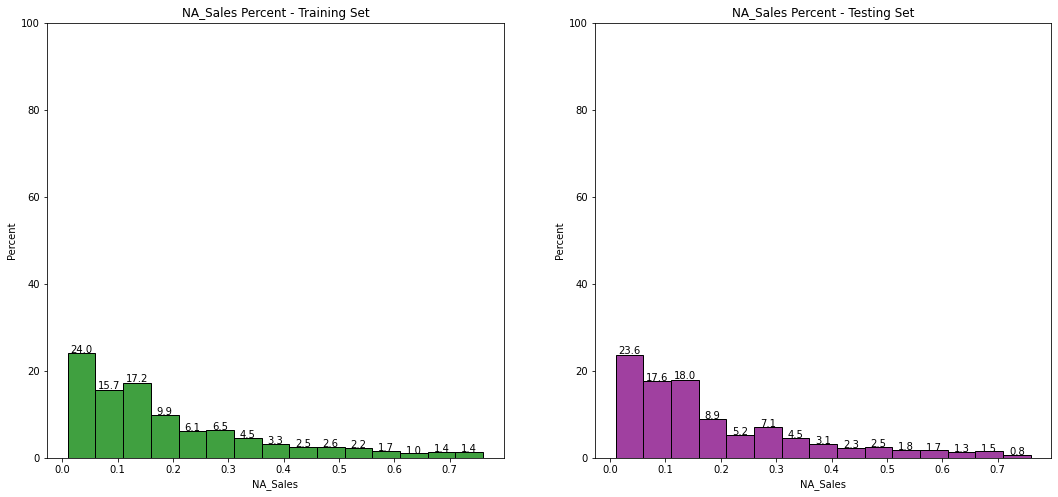

In [43]:
plt.figure(figsize=(18, 8))
ax = plt.subplot(1, 2, 1)
plt.title("NA_Sales Percent - Training Set")
sns.histplot(train_df['NA_Sales'], bins=15, color='green', stat='percent')
plt.ylim(0, 100)
show_values(ax)
ax1 = plt.subplot(1, 2, 2)
plt.title("NA_Sales Percent - Testing Set")
sns.histplot(test_df['NA_Sales'], bins=15, color='purple', stat='percent')
plt.ylim(0, 100)
show_values(ax1)

The histograms of the training and testing sets have a very similar distribution of the histogram created with the full dataset. That's primarialy because the train/test split is done randomly and, therefore, we can assume that each set is valid representation of the original dataset df.

###Preparing Data and Plotting Linear Regression Model

In [44]:
#Splitting independent/dependent variables
X_train_simplified = train_df[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].to_numpy()
y_train = train_df['NA_Sales'].to_numpy().reshape(-1)
X_test_simplified = test_df[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']].to_numpy()
y_test = test_df['NA_Sales'].to_numpy().reshape(-1)

In [45]:
variables_for_regression = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
dependent_variable = 'NA_Sales'

                                CRITIC_SCORE

Critic_Score Slope Coefficient: 0.00404
Critic_Score Intercept: -0.08071
Critic_Score Training Coefficient of Determination (R-Squared): 0.08159
Critic_Score Mean Absolute Error (MAE): 0.12802
Critic_Score Mean Squared Error (MSE): 0.0268
Critic_Score Testing Coefficient of Determination (R-Squared): 0.04271



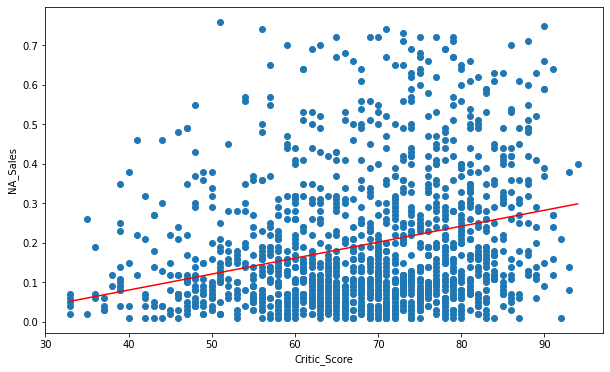


p-value of Critic_Score variable is 6.172997707987892e-17; hence, this model is statistically significant.

----------------------------------------------------------------------------------

                                CRITIC_COUNT

Critic_Count Slope Coefficient: 0.00276
Critic_Count Intercept: 0.12657
Critic_Count Training Coefficient of Determination (R-Squared): 0.05806
Critic_Count Mean Absolute Error (MAE): 0.12912
Critic_Count Mean Squared Error (MSE): 0.02708
Critic_Count Testing Coefficient of Determination (R-Squared): 0.0327



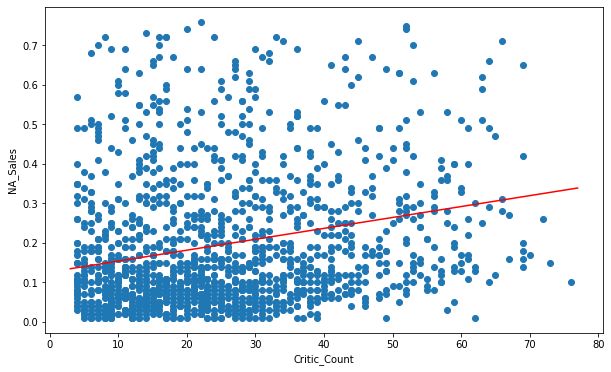


p-value of Critic_Count variable is 2.801622402430958e-13; hence, this model is statistically significant.

----------------------------------------------------------------------------------

                                  USER_SCORE

User_Score Slope Coefficient: 0.00126
User_Score Intercept: 0.10446
User_Score Training Coefficient of Determination (R-Squared): 0.00745
User_Score Mean Absolute Error (MAE): 0.13162
User_Score Mean Squared Error (MSE): 0.0277
User_Score Testing Coefficient of Determination (R-Squared): 0.0107



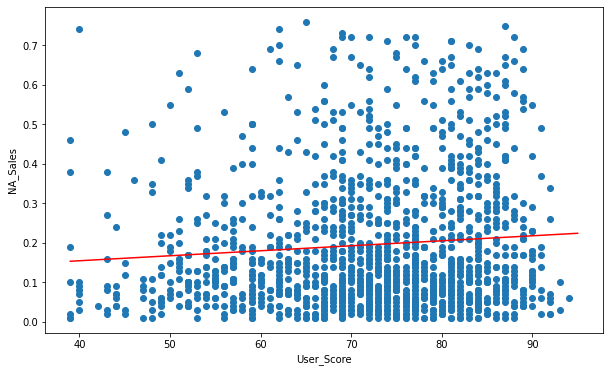


p-value of User_Score variable is 3.1371947439977426e-05; hence, this model is statistically significant.

----------------------------------------------------------------------------------

                                  USER_COUNT

User_Count Slope Coefficient: 0.00138
User_Count Intercept: 0.15417
User_Count Training Coefficient of Determination (R-Squared): 0.06547
User_Count Mean Absolute Error (MAE): 0.12778
User_Count Mean Squared Error (MSE): 0.02665
User_Count Testing Coefficient of Determination (R-Squared): 0.04812



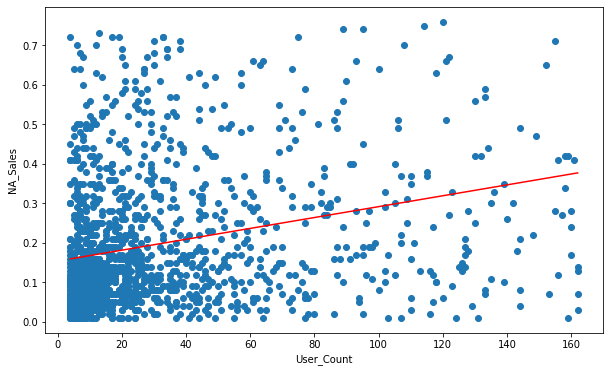


p-value of User_Count variable is 2.1689811057903953e-18; hence, this model is statistically significant.

----------------------------------------------------------------------------------



In [46]:
#Creating a loop since we are going to preform the same task for each variable
i = 0
while i < len(variables_for_regression): 
  for variable in variables_for_regression:
    print(f"{variable.upper() :>44}")
    print('')
    #TASK IV A
    #Fitting the regression model with the training set
    regression_model = LinearRegression()
    regression_model = regression_model.fit(X_train_simplified[:, i].reshape(-1, 1), y_train)
    #TASK IV B
    #Prediction on the testing set
    regression_model_predictions = regression_model.predict(X_test_simplified[:, i].reshape(-1, 1))
    #TASK IV C
    #Getting metrics
    print(f"{variable} Slope Coefficient: {regression_model.coef_[0].round(5)}")
    print(f"{variable} Intercept: {regression_model.intercept_.round(5)}")
    print(f"{variable} Training Coefficient of Determination (R-Squared): {regression_model.score(X_train_simplified[:, i].reshape(-1, 1), y_train).round(5)}") 
    print(f"{variable} Mean Absolute Error (MAE): {mae(y_test, regression_model_predictions).round(5)}")
    print(f"{variable} Mean Squared Error (MSE): {mse(y_test, regression_model_predictions).round(5)}")
    print(f"{variable} Testing Coefficient of Determination (R-Squared): {r2_score(y_test, regression_model_predictions).round(5)}")
    print('')
    #TASK IV D
    #Making Scatter Plot Independet Variable vs. NA_Sales
    testing_instances = regression_model_predictions.shape[0]
    variable_data = np.zeros(shape=(testing_instances, 2))
    variable_data[:, 0] = X_test_simplified[:, i]
    variable_data[:, 1] = y_test
    variable_xvalues = np.arange(df_onehot[variable].min(), df_onehot[variable].max(), .001)
    variable_model_line = regression_model.coef_[0] * variable_xvalues + regression_model.intercept_
    plt.figure(figsize=(10, 6))
    plt.scatter(variable_data[:, 0], variable_data[:, 1])
    plt.plot(variable_xvalues, variable_model_line, color='red', linestyle='-')
    plt.xlabel(variable)
    plt.ylabel('NA_Sales')
    plt.show()
    print('')
    #TASK IV E
    #Getting Metric and determining statistical significance of the model
    slope, intercept, r_value, p_value, std_err = stats.linregress(X_test_simplified[:, i],y_test)
    if p_value <= 0.05:
      print(f"p-value of {variable} variable is {p_value}; hence, this model is statistically significant.")
    else:
      print(f"p-value of {variable} variable is {p_value}; hence, this model is NOT statistically significant.")
    print('')
    print('-' * 82)
    print('')
    i += 1

###Plotting a Multi Variate Linear Regression Model

In [47]:
independent_variables = sorted(list(df_onehot.columns))
independent_variables.remove('NA_Sales')

In [48]:
X_train_full = train_df[independent_variables].to_numpy()
y_train_full = train_df[dependent_variable].to_numpy().reshape(-1)
X_test_full = test_df[independent_variables].to_numpy()
y_test_full = test_df[dependent_variable].to_numpy().reshape(-1)

In [49]:
#Instantiating and fiting linear regression model
full_linear_regression = LinearRegression()
full_linear_regression = full_linear_regression.fit(X_train_full, y_train_full)
#Making predictions:
full_linear_regression_predictions = full_linear_regression.predict(X_test_full)
betas_df = pd.DataFrame({'Variables': independent_variables, 'Slope Coefficients': full_linear_regression.coef_})


In [50]:
betas_df

Variables  Slope Coefficients
0         Critic_Count            0.001052
1         Critic_Score            0.003065
2         Genre_Action            0.018995
3      Genre_Adventure           -0.034765
4       Genre_Fighting            0.032973
5           Genre_Misc            0.053932
6       Genre_Platform            0.014379
7         Genre_Puzzle           -0.038236
8         Genre_Racing           -0.001939
9   Genre_Role-Playing           -0.057757
10       Genre_Shooter            0.012607
11    Genre_Simulation            0.031016
12        Genre_Sports            0.034533
13      Genre_Strategy           -0.065737
14        Platform_3DS           -0.009479
15         Platform_DS            0.055699
16        Platform_GBA            0.061317
17         Platform_GC            0.075852
18         Platform_PC           -0.180350
19         Platform_PS            0.083891
20        Platform_PS2            0.059816
21        Platform_PS3            0.026412
22        Platform_PS4           -0.128926
23        Platform_PSP            0.033072
24        Platform_PSV           -0.121441
25        Platform_Wii            0.093548
26       Platform_WiiU           -0.061292
27       Platform_X360            0.032521
28         Platform_XB            0.057862
29       Platform_XOne           -0.078502
30            Rating_E            0.024468
31         Rating_E10+            0.029137
32            Rating_M           -0.045602
33            Rating_T           -0.009048
34      Rating_missing            0.001045
35          User_Count            0.001690
36          User_Score           -0.001286

###Evaluating Linear Regression Model

In [51]:
print(f"Full Linear Regression Model Intercept: {full_linear_regression.intercept_.round(5)}")
print(f"Full Linear Regression Model Training Coefficient of Determination (R-Squared): {full_linear_regression.score(X_train_full, y_train_full).round(5)}") 
print('')
print('EVALUATION METRICS')
print(f"Full Linear Regression Model Mean Absolute Error (MAE): {mae(y_test_full, full_linear_regression_predictions).round(5)}")
print(f"Full Linear Regression Model Mean Squared Error (MSE): {mse(y_test_full, full_linear_regression_predictions).round(5)}")
print(f"Full Linear Regression Model Testing Coefficient of Determination (R-Squared): {r2_score(y_test_full, full_linear_regression_predictions).round(5)}")
X2 = sm.add_constant(X_test_full)
estimator = sm.OLS(y_test_full, X2)
p_value_full = estimator.fit().f_pvalue
if p_value_full <= 0.05:
  print(f"p-value = {p_value_full}; hence, this model is statistically significant.")
else:
  print(f"p-value = {p_value_full}; hence, this model is NOT statistically significant.")

Full Linear Regression Model Intercept: -0.04913
Full Linear Regression Model Training Coefficient of Determination (R-Squared): 0.25275

EVALUATION METRICS
Full Linear Regression Model Mean Absolute Error (MAE): 0.11447
Full Linear Regression Model Mean Squared Error (MSE): 0.02214
Full Linear Regression Model Testing Coefficient of Determination (R-Squared): 0.20912
p-value = 8.478362604399974e-60; hence, this model is statistically significant.


####Plotting a Linear Regression Model with Genre_Sports Variable Only

In [52]:
independent_variables.index('Genre_Sports')

12

In [53]:
#Fitting the regression model with the training set - Genre_Sports variable
genre_sports_lr = LinearRegression()
genre_sports_lr = genre_sports_lr.fit(X_train_full[:, 12].reshape(-1, 1), y_train_full)
#Prediction on the testing set
genre_sports_lr_predictions = genre_sports_lr.predict(X_test_full[:, 12].reshape(-1, 1))

####Evaluating the Model

In [54]:
#Getting metrics
print(f"Genre_Sport Slope Coefficient: {genre_sports_lr.coef_[0].round(5)}")
print(f"Genre_Sport Intercept: {genre_sports_lr.intercept_.round(5)}")
print(f"Genre_Sport Training Coefficient of Determination (R-Squared): {genre_sports_lr.score(X_train_full[:, 12].reshape(-1, 1), y_train_full).round(5)}") 
print(f"Genre_Sport Mean Absolute Error (MAE): {mae(y_test_full, genre_sports_lr_predictions).round(5)}")
print(f"Genre_Sport Mean Squared Error (MSE): {mse(y_test_full, genre_sports_lr_predictions).round(5)}")
print(f"Genre_Sport Testing Coefficient of Determination (R-Squared): {r2_score(y_test_full, genre_sports_lr_predictions).round(5)}")

Genre_Sport Slope Coefficient: 0.05665
Genre_Sport Intercept: 0.18612
Genre_Sport Training Coefficient of Determination (R-Squared): 0.01466
Genre_Sport Mean Absolute Error (MAE): 0.13124
Genre_Sport Mean Squared Error (MSE): 0.02756
Genre_Sport Testing Coefficient of Determination (R-Squared): 0.01558


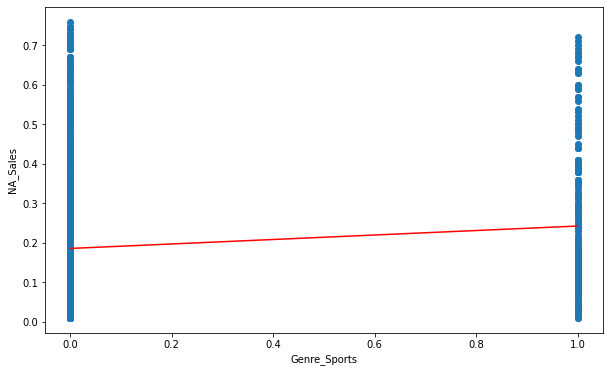


p-value of Genre_Sports variable is 1.6514759444589582e-06; hence, this model is statistically significant.


In [55]:
#Making Scatter Plot Genre_Sports vs. NA_Sales
genre_sports_instances = genre_sports_lr_predictions.shape[0]
genre_sports_data = np.zeros(shape=(genre_sports_instances, 2))
genre_sports_data[:, 0] = X_test_full[:, 12]
genre_sports_data[:, 1] = y_test_full
genre_sports_xvalues = np.arange(df_onehot['Genre_Sports'].min(), df_onehot['Genre_Sports'].max(), .001)
genre_sports_model_line = genre_sports_lr.coef_[0] * genre_sports_xvalues + genre_sports_lr.intercept_
plt.figure(figsize=(10, 6))
plt.scatter(genre_sports_data[:, 0], genre_sports_data[:, 1])
plt.plot(genre_sports_xvalues, genre_sports_model_line, color='red', linestyle='-')
plt.xlabel('Genre_Sports')
plt.ylabel('NA_Sales')
plt.show()
print('')
#TASK IV E
#Getting Metric and determining statistical significance of the model
slope, intercept, r_value, p_value, std_err = stats.linregress(X_test_full[:, 12],y_test_full)
if p_value <= 0.05:
  print(f"p-value of Genre_Sports variable is {p_value}; hence, this model is statistically significant.")
else:
  print(f"p-value of Genre_Sports variable is {p_value}; hence, this model is NOT statistically significant.")

In [56]:
test_statistic, p_value = f_regression(X_test_full[:, 12].reshape(-1, 1), y_test_full)
print(f"ANOVA p-Value: {p_value[0].round(8)}")
if p_value[0] <= 0.05:
  print(f"p-value = {p_value[0].round(8)}; hence, this model is statistically significant.")
else:
  print(f"p-value = {p_value[0].round(8)}; hence, this model is NOT statistically significant.")

ANOVA p-Value: 1.65e-06
p-value = 1.65e-06; hence, this model is statistically significant.


####Evaluating User_Count Variable Distribution

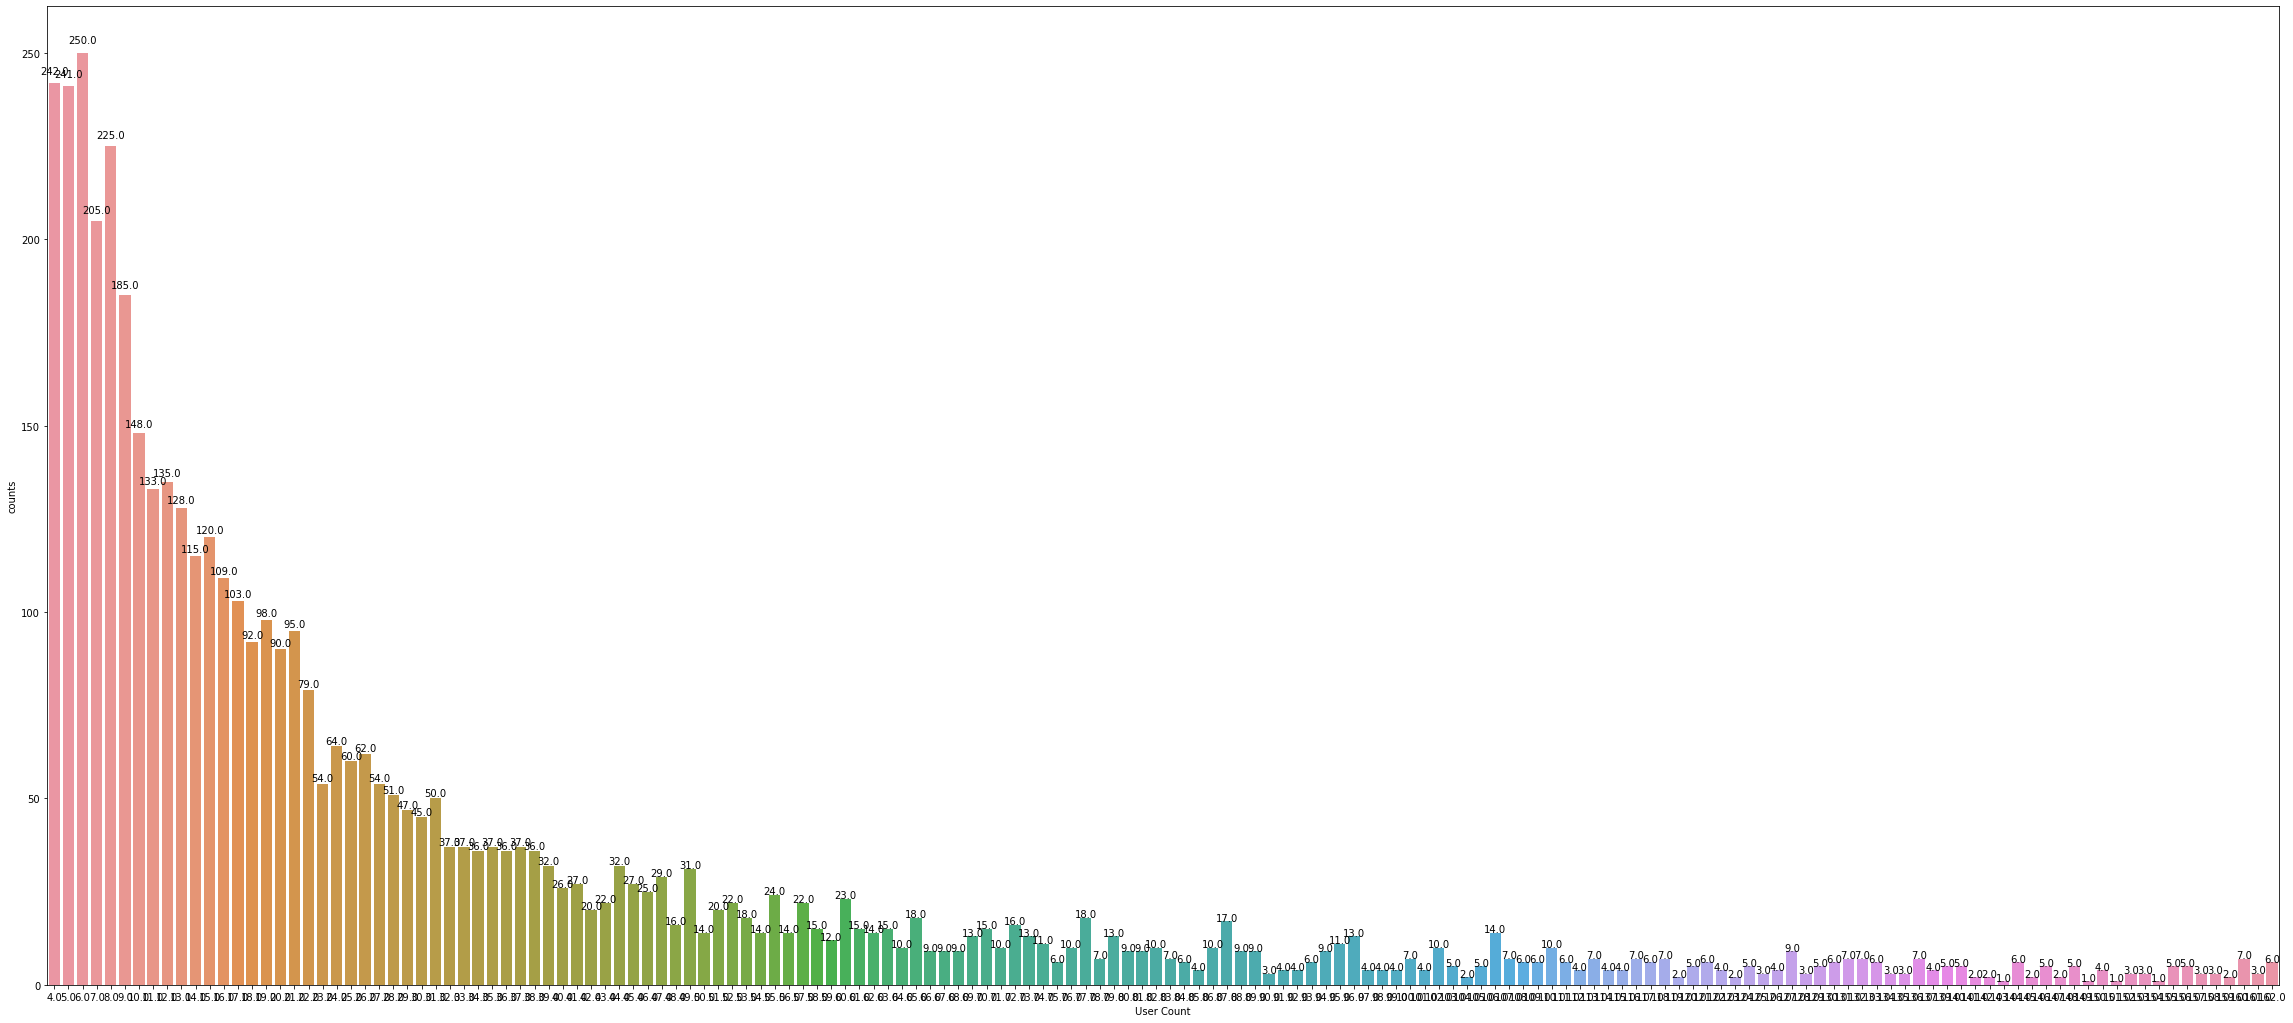

In [57]:
user_counts = df['User_Count'].value_counts()
user_count_df = user_counts.rename_axis('User Count').reset_index(name='counts')
plt.figure(figsize=(40, 18))
graph = sns.barplot(x='User Count', y='counts', data=user_count_df)
show_values(graph)
plt.show()

####Linearizing User_Count Variable Distribution

In [58]:
df_onehot['Linear_User_Count'] = np.log10(df_onehot['User_Count'])

In [59]:
df_onehot.head(6)

Critic_Score  Critic_Count  User_Score  User_Count  NA_Sales  \
13           81.0          48.0        86.0       124.0      0.47   
92           72.0          38.0        86.0        83.0      0.37   
111          79.0          61.0        79.0       139.0      0.51   
121          64.0          45.0        74.0        30.0      0.52   
128          59.0          40.0        58.0        71.0      0.63   
130          82.0          41.0        81.0        68.0      0.71   

     Platform_3DS  Platform_DS  Platform_GBA  Platform_GC  Platform_PC  ...  \
13              0            0             0            0            0  ...   
92              0            0             0            0            0  ...   
111             0            0             0            0            0  ...   
121             0            0             0            0            0  ...   
128             0            0             0            0            0  ...   
130             0            0             0            0            0  ...   

     Genre_Shooter  Genre_Simulation  Genre_Sports  Genre_Strategy  Rating_E  \
13               0                 0             0               0         0   
92               0                 0             0               0         0   
111              0                 0             0               0         0   
121              1                 0             0               0         0   
128              0                 0             0               0         0   
130              0                 0             0               0         0   

     Rating_E10+  Rating_M  Rating_T  Rating_missing  Linear_User_Count  
13             0         0         1               0           2.093422  
92             0         0         1               0           1.919078  
111            0         0         1               0           2.143015  
121            0         0         1               0           1.477121  
128            0         0         1               0           1.851258  
130            0         0         1               0           1.832509  

[6 rows x 39 columns]

####Preparing Data to Plot a Linear Regression Between the Target and User_Count_Linearized 

In [60]:
x_df_onehot_train, x_df_onehot_test, y_df_onehot_train, y_df_onehot_test = train_test_split(df_onehot.drop('NA_Sales', axis=1),
                                                                                            df_onehot['NA_Sales'],
                                                                                            train_size=0.7, random_state=0)

In [61]:
x_df_onehot_train.head(6)

Critic_Score  Critic_Count  User_Score  User_Count  Platform_3DS  \
3485          33.0           6.0        74.0        18.0             0   
764           81.0          26.0        81.0        19.0             0   
2464          65.0          26.0        75.0        10.0             0   
2390          81.0          28.0        70.0        47.0             0   
1219          51.0          11.0        60.0         8.0             0   
2714          73.0          18.0        58.0       111.0             0   

      Platform_DS  Platform_GBA  Platform_GC  Platform_PC  Platform_PS  ...  \
3485            0             0            1            0            0  ...   
764             0             0            0            0            0  ...   
2464            0             0            0            0            0  ...   
2390            0             0            0            0            0  ...   
1219            0             0            0            0            0  ...   
2714            0             0            0            0            0  ...   

      Genre_Shooter  Genre_Simulation  Genre_Sports  Genre_Strategy  Rating_E  \
3485              0                 0             0               0         1   
764               0                 1             0               0         0   
2464              0                 0             0               0         1   
2390              0                 0             1               0         1   
1219              0                 0             0               0         0   
2714              0                 0             1               0         1   

      Rating_E10+  Rating_M  Rating_T  Rating_missing  Linear_User_Count  
3485            0         0         0               0           1.255273  
764             0         0         1               0           1.278754  
2464            0         0         0               0           1.000000  
2390            0         0         0               0           1.672098  
1219            0         0         1               0           0.903090  
2714            0         0         0               0           2.045323  

[6 rows x 38 columns]

###Repeating the Process

In [62]:
log_lr = LinearRegression()
log_lr = log_lr.fit(x_df_onehot_train.to_numpy()[:, 37].reshape(-1, 1), y_df_onehot_train)
log_lr_predictions = log_lr.predict(x_df_onehot_test.to_numpy()[:, 37].reshape(-1, 1))
#Getting metrics
print(f"Linear User Count Slope Coefficient: {log_lr.coef_[0].round(5)}")
print(f"Linear User Count Intercept: {log_lr.intercept_.round(5)}")
print(f"Linear User Count Training Coefficient of Determination (R-Squared): {log_lr.score(x_df_onehot_train.to_numpy()[:, 37].reshape(-1, 1), y_df_onehot_train).round(5)}") 
print(f"Linear User Count Mean Absolute Error (MAE): {mae(y_df_onehot_test, log_lr_predictions).round(5)}")
print(f"Linear User Count Mean Squared Error (MSE): {mse(y_df_onehot_test, log_lr_predictions).round(5)}")
print(f"Linear User Count Testing Coefficient of Determination (R-Squared): {r2_score(y_df_onehot_test, log_lr_predictions).round(5)}")


Linear User Count Slope Coefficient: 0.11713
Linear User Count Intercept: 0.04638
Linear User Count Training Coefficient of Determination (R-Squared): 0.0802
Linear User Count Mean Absolute Error (MAE): 0.12593
Linear User Count Mean Squared Error (MSE): 0.02607
Linear User Count Testing Coefficient of Determination (R-Squared): 0.06894


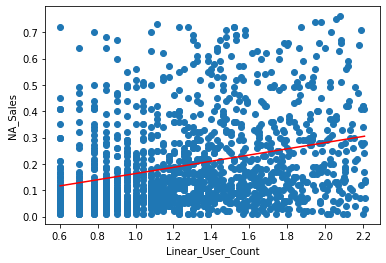

In [63]:
log_instances = log_lr_predictions.shape[0]
log_data = np.zeros(shape=(log_instances, 2))
log_data[:, 0] = x_df_onehot_test.to_numpy()[:, 37]
log_data[:, 1] = y_df_onehot_test
log_xvalues = np.arange(x_df_onehot_test['Linear_User_Count'].min(), x_df_onehot_test['Linear_User_Count'].max(), .001)
log_model_line = log_lr.coef_[0]*log_xvalues + log_lr.intercept_
plt.scatter(log_data[:, 0], log_data[:, 1])
plt.plot(log_xvalues, log_model_line, c='red', linestyle='-')
plt.xlabel('Linear_User_Count')
plt.ylabel('NA_Sales')
plt.show()

In [64]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x_df_onehot_test.to_numpy()[:, 37].astype(float), y_df_onehot_test)
if p_value <= 0.05:
  print(f"p-value = {p_value}; hence, this model is statistically significant.")
else:
  print(f"p-value = {p_value}; hence, this model is NOT statistically significant.")

p-value = 1.3761388124803078e-24; hence, this model is statistically significant.


In [65]:
#Instantiating and fiting linear regression model
log_full = LinearRegression()
log_full = log_full.fit(x_df_onehot_train, y_df_onehot_train)
#Making predictions:
log_full_predictions = log_full.predict(x_df_onehot_test)

independent_variables_log = list(df_onehot.columns)
independent_variables_log.remove('NA_Sales')
betas_log_df = pd.DataFrame({'Variables': independent_variables_log, 'Slope Coefficients': log_full.coef_})

In [66]:
betas_log_df

Variables  Slope Coefficients
0         Critic_Score            0.002752
1         Critic_Count            0.000554
2           User_Score           -0.001587
3           User_Count            0.000226
4         Platform_3DS           -0.018890
5          Platform_DS            0.066099
6         Platform_GBA            0.082201
7          Platform_GC            0.091317
8          Platform_PC           -0.194618
9          Platform_PS            0.091128
10        Platform_PS2            0.064752
11        Platform_PS3            0.023854
12        Platform_PS4           -0.136195
13        Platform_PSP            0.034760
14        Platform_PSV           -0.134885
15        Platform_Wii            0.095858
16       Platform_WiiU           -0.078128
17       Platform_X360            0.030292
18         Platform_XB            0.076848
19       Platform_XOne           -0.094393
20        Genre_Action            0.018213
21     Genre_Adventure           -0.032843
22      Genre_Fighting            0.028423
23          Genre_Misc            0.061183
24      Genre_Platform            0.009918
25        Genre_Puzzle           -0.026347
26        Genre_Racing           -0.001181
27  Genre_Role-Playing           -0.066237
28       Genre_Shooter            0.008893
29    Genre_Simulation            0.030151
30        Genre_Sports            0.037222
31      Genre_Strategy           -0.067393
32            Rating_E            0.028289
33         Rating_E10+            0.032913
34            Rating_M           -0.048271
35            Rating_T           -0.008753
36      Rating_missing           -0.004178
37   Linear_User_Count            0.153205

In [67]:
print(f"Linear User Count Intercept: {log_full.intercept_.round(5)}")
print(f"Linear User Count Training Coefficient of Determination (R-Squared): {log_full.score(x_df_onehot_train, y_df_onehot_train).round(5)}") 
print(f"Linear User Count Mean Absolute Error (MAE): {mae(y_df_onehot_test, log_full_predictions).round(5)}")
print(f"Linear User Count Mean Squared Error (MSE): {mse(y_df_onehot_test, log_full_predictions).round(5)}")
print(f"Linear User Count Testing Coefficient of Determination (R-Squared): {r2_score(y_df_onehot_test, log_full_predictions).round(5)}")

Linear User Count Intercept: -0.15002
Linear User Count Training Coefficient of Determination (R-Squared): 0.27612
Linear User Count Mean Absolute Error (MAE): 0.11121
Linear User Count Mean Squared Error (MSE): 0.02126
Linear User Count Testing Coefficient of Determination (R-Squared): 0.24064


In [68]:
x2 = sm.add_constant(x_df_onehot_test.to_numpy())
estimator = sm.OLS(y_df_onehot_test.to_numpy(), x2)
Pvalue = estimator.fit().f_pvalue
if Pvalue <= 0.05:
  print(f"p-value = {Pvalue}; hence, this model is statistically significant.")
else:
  print(f"p-value = {Pvalue}; hence, this model is NOT statistically significant.")

p-value = 2.1567847796228222e-70; hence, this model is statistically significant.


In [69]:
comparison_nonlinear_over_linear = pd.DataFrame({'': ['p-value', 'Coefficient of Determination'], 
                                                 'Non-Linear': [p_value_full, r2_score(y_test_full, full_linear_regression_predictions).round(5)], 
                                                 'Linear': [Pvalue, r2_score(y_df_onehot_test, log_full_predictions).round(5)]})

In [70]:
comparison_nonlinear_over_linear

Non-Linear        Linear
0                       p-value  8.478363e-60  2.156785e-70
1  Coefficient of Determination  2.091200e-01  2.406400e-01

As seen in the table above, the Linear dataframe, in other words, the dataframe that was expanded due to the creation of a linearized version of User_Counts, performs better than the Non-Linear (original dataset) dataframe. This is justified by an increase in the R-Squared and a decrease in the p-value, which makes the expanded dataframe be more statistically significant.